# IMPORT THE REQUIRED LIBRARIES

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt

## LOAD THE MNIST DATASET AND PREPROCESS IT
NOTE: WE DIVIDE PIXEL VALUES IN THE DATSET BY 255.0 TO NORMALIZE THEM IN RANGE OF 0-1

In [2]:
(train_images, train_labels),(test_images,test_labels) = mnist.load_data()
train_images, test_images = train_images/255.0 ,test_images/255.0

11490434/11490434 [==============================] - 0s 0us/step


# BUILDING THE NEURAL NETWORK MODEL

In [5]:
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),  #flatten the 28x28 images into a 1d array
    layers.Dense(128, activation='relu'),   #fully connected layer with ReLU activation
    layers.Dropout(0.2),                    #dropout for regularization
    layers.Dense(10, activation='softmax')  #output layer has softmax activation function for multiclass classification
])

# COMPILE THE MODEL

In [6]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# TRAIN THE MODEL

In [9]:
model.fit(train_images,train_labels,epochs=30)

Epoch 1/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0643 - accuracy: 0.9795
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0586 - accuracy: 0.9812
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0553 - accuracy: 0.9824
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0483 - accuracy: 0.9844
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0444 - accuracy: 0.9851
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0402 - accuracy: 0.9864
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0395 - accuracy: 0.9872
Epoch 8/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0373 - accuracy: 0.9875
Epoch 9/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0343 - accuracy: 0.9883
Epoch 10/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.031

# EVALUATE ON THE TEST SET

In [10]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.1042 - accuracy: 0.9797
Test accuracy: 0.9797000288963318


# MAKE PREDICTIONS

In [11]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


# VISUALIZE A FEW PREDICTIONS

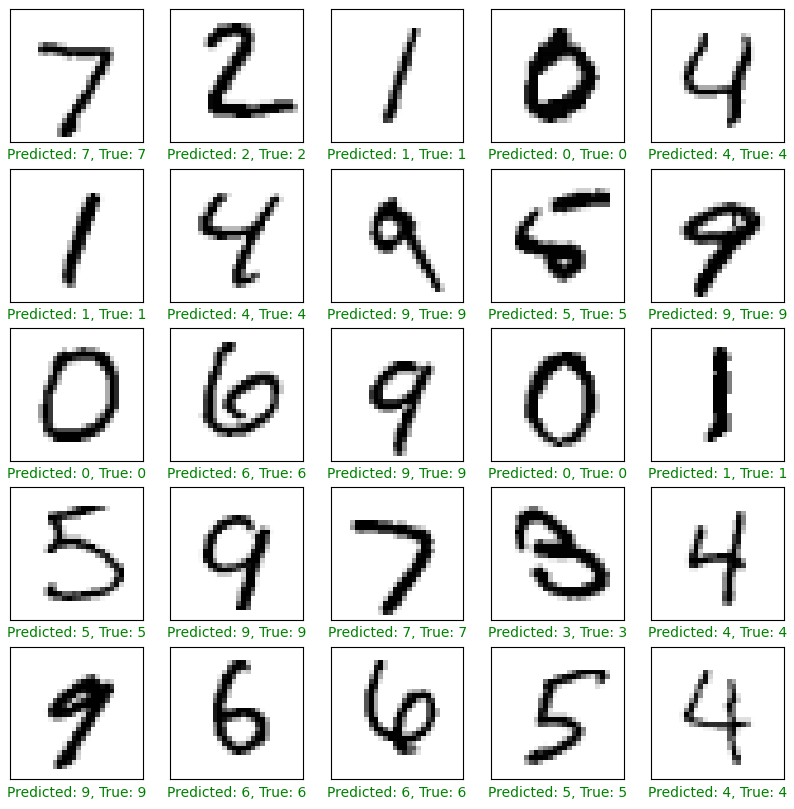

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  predicted_label = tf.argmax(predictions[i])
  true_label = test_labels[i]

  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel(f'Predicted: {predicted_label}, True: {true_label}', color = color)

plt.show()